<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
Last Updated: September 20, 2020\
Author: Raka Ardhi

## NYC Property Sales Introduction

The aim of this projects is to introduce you to practical statistic with Python as concrete and as consistent as possible. Using what you’ve learned; download the NYC Property Sales Dataset from Kaggle. This dataset is a record of every building or building unit (apartment, etc.) sold in the New York City property market over a 12-month period.

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

* `BOROUGH`: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
* `BLOCK`; `LOT`: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.
* `BUILDING CLASS AT PRESENT` and `BUILDING CLASS AT TIME OF SALE`: The type of building at various points in time.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

* Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.
* This dataset uses the financial definition of a building/building unit, for tax purposes. In case a single entity owns the building in question, a sale covers the value of the entire building. In case a building is owned piecemeal by its residents (a condominium), a sale refers to a single apartment (or group of apartments) owned by some individual.

Formulate a question and derive a statistical hypothesis test to answer the question. You have to demonstrate that you’re able to make decisions using data in a scientific manner. Examples of questions can be:

* Is there a difference in unit sold between property built in 1900-2000 and 2001 so on?
* Is there a difference in unit sold based on building category?
* What can you discover about New York City real estate by looking at a year's worth of raw transaction records? Can you spot trends in the market?

Please make sure that you have completed the lesson for this course, namely Python and Practical Statistics which is part of this Program.

**Note:** You can take a look at Project Rubric below:

| Code Review |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Mean | Student implement mean to specifics column/data using pandas, numpy, or scipy|
| Median | Student implement median to specifics column/data using pandas, numpy, or scipy|
| Modus | Student implement modus to specifics column/data using pandas, numpy, or scipy|
| Central Tendencies | Implementing Central Tendencies through dataset |
| Box Plot | Implementing Box Plot to visualize spesific data |
| Z-Score | Implementing Z-score concept to specific data |
| Probability Distribution | Student analyzing distribution of data and gain insight from the distribution |
| Intervals | Implementing Confidence or Prediction Intervals |
| Hypotesis Testing | Made 1 Hypotesis and get conclusion from data |
| Preprocessing | Student preprocess dataset before applying the statistical treatment. |
| Does the code run without errors? | The code runs without errors. All code is functional and formatted properly. |

| Readability |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
| Well Documented | All cell in notebook are well documented with markdown above each cell explaining the code|

| Analysis |  |
| :--- | :--- |
| CRITERIA | SPECIFICATIONS |
|Overall Analysis| Gain an insight/conclusion of overall plots that answer the hypotesis |

**Focus on "Graded-Function" sections.**

------------

## Data Preparation

Load the library you need.

Get your NYC property data from [here](https://www.kaggle.com/new-york-city/nyc-property-sales) and load the dataframe to your notebook.

In [1]:
# import required packages
import numpy as np
import pandas as pd
%matplotlib inline
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import math
import statistics

# for latex equations
from IPython.display import Math, Latex
# for displaying images
from IPython.core.display import Image
from scipy.stats import uniform

# import seaborn
import seaborn as sns
# settings for seaborn plotting style
sns.set(color_codes=True)
# settings for seaborn plot sizes
# sns.set(rc={'figure.figsize':(5,5)})

# to calculate p-value
import statsmodels.api as sm

# to calculate p-value from t-test
import scipy.stats.distributions as dist

In [2]:
# import data
df_nyc_sales=pd.read_csv('nyc-rolling-sales.csv')
print("Data has been successfully imported")

Data has been successfully imported


Let's view the top 5 rows of the dataset using the `head()` function.

In [3]:
# check header
df_nyc_sales.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


We can also veiw the bottom 5 rows of the dataset using the `tail()` function.

In [4]:
# check the tail
df_nyc_sales.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

To view the dimensions of the dataframe, we use the `.shape` parameter. Expected result: (84548, 22)

In [5]:
# view its shape
df_nyc_sales.shape

(84548, 22)

In [6]:
# check for column names
df_nyc_sales.keys()

Index(['Unnamed: 0', 'BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY',
       'TAX CLASS AT PRESENT', 'BLOCK', 'LOT', 'EASE-MENT',
       'BUILDING CLASS AT PRESENT', 'ADDRESS', 'APARTMENT NUMBER', 'ZIP CODE',
       'RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS',
       'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE',
       'SALE PRICE', 'SALE DATE'],
      dtype='object')

In [7]:
# check hidden column contents and other suspicious columns (contain any values or not)
df_nyc_sales[['Unnamed: 0', 'ZIP CODE','APARTMENT NUMBER','EASE-MENT']]

,Unnamed: 0,ZIP CODE,APARTMENT NUMBER,EASE-MENT
0,4,10009,,
1,5,10009,,
2,6,10009,,
3,7,10009,,
4,8,10009,,
...,...,...,...,...
84543,8409,10309,,
84544,8410,10309,,
84545,8411,10309,,
84546,8412,10309,,


In [8]:
# also check the statistics of the four columns mentioned above
df_nyc_sales[['Unnamed: 0', 'ZIP CODE','APARTMENT NUMBER','EASE-MENT']].describe()

,Unnamed: 0,ZIP CODE
count,84548.000000,84548.000000
mean,10344.359878,10731.991614
std,7151.779436,1290.879147
min,4.000000,0.000000
25%,4231.000000,10305.000000
50%,8942.000000,11209.000000
75%,15987.250000,11357.000000
max,26739.000000,11694.000000


Based on the checking above, we may drop APARTMENT NUMBER and EASE-MENT as it contains no value. Also Unnamed: 0 as there is no further explanation on what this column represents.

According to this official page, Ease-ment is "is a right, such as a right of way, which allows an entity to make limited use of another’s real property. For example: MTA railroad tracks that run across a portion of another property". Also, the Unnamed column is not mentioned and was likely used for iterating through records. So, those two columns are removed for now.

In [9]:
# drop Unnamed:0, APARTMENT NUMBER, EASE-MENT
df_nyc_sales.drop(['Unnamed: 0','EASE-MENT'], inplace=True, axis=1)
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Let's view Dtype of each features in dataframe using `.info()` function.

In [10]:
df_nyc_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

It looks like empty records are not being treated as NA. We convert columns to their appropriate data types to obtain NAs.

In [11]:
#First, let's check which columns should be categorical
print('Column name')
for col in df_nyc_sales.columns:
    if df_nyc_sales[col].dtype=='object':
        print(col, df_nyc_sales[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [12]:
# change data types into what it's supposed to be
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df_nyc_sales[col] = pd.to_numeric(df_nyc_sales[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df_nyc_sales[col] = df_nyc_sales[col].astype('category')

df_nyc_sales['SALE DATE'] = pd.to_datetime(df_nyc_sales['SALE DATE'], errors='coerce')

Our dataset is ready for checking missing values.

In [13]:
# check for missing values
missing = df_nyc_sales.isnull().sum()/len(df_nyc_sales)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df_nyc_sales.isnull().sum()[df_nyc_sales.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Around 30% of GROSS SF and LAND SF are missing. Furthermore, around 17% of SALE PRICE is also missing.

We can fill in the missing value from one column to another, which will help us reduce missing values. Expected values:

(6, 20)

(1366, 20)

In [14]:
# check how many rows that contain null values
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull())].shape)
print(df_nyc_sales[(df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


There are 1372 rows that can be filled in with their approximate values.

In [15]:
df_nyc_sales['LAND SQUARE FEET'] = df_nyc_sales['LAND SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].isnull()) & (df_nyc_sales['GROSS SQUARE FEET'].notnull()), df_nyc_sales['GROSS SQUARE FEET'])
df_nyc_sales['GROSS SQUARE FEET'] = df_nyc_sales['GROSS SQUARE FEET'].mask((df_nyc_sales['LAND SQUARE FEET'].notnull()) & (df_nyc_sales['GROSS SQUARE FEET'].isnull()), df_nyc_sales['LAND SQUARE FEET'])

In [16]:
#  Check for duplicates before

print(sum(df_nyc_sales.duplicated()))

df_nyc_sales[df_nyc_sales.duplicated(keep='first')].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head(10)

# df.duplicated() automatically excludes duplicates, to keep duplicates in df we use keep=False

# in df.duplicated(df.columns) we can specify column names to look for duplicates only in those mentioned columns.

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76384,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06
76644,5,ARROCHAR,02 TWO FAMILY DWELLINGS,1,3103,57,B2,129 MC CLEAN AVENUE,,10305,2,0,2,5000.0,2733.0,1925,1,B2,NaN,2017-03-21
50127,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,856,139,C0,22-18 27TH STREET,,11105,3,0,3,2000.0,1400.0,1930,1,C0,NaN,2017-01-12
50053,4,ASTORIA,03 THREE FAMILY DWELLINGS,1,653,159,C0,24-56 38TH STREET,,11103,3,0,3,2101.0,3160.0,1965,1,C0,NaN,2017-06-29
50266,4,ASTORIA,07 RENTALS - WALKUP APARTMENTS,2,839,21,C1,27-01 ASTORIA BOULEVARD,,11102,20,0,20,4710.0,11324.0,1973,2,C1,832500.0,2017-04-07
50299,4,ASTORIA,08 RENTALS - ELEVATOR APARTMENTS,2,839,20,D1,27-09 ASTORIA BOULEVARD,,11102,15,0,15,2500.0,8000.0,1922,2,D1,NaN,2017-04-07
49771,4,ASTORIA,02 TWO FAMILY DWELLINGS,1,626,38,B9,30-21 34TH STREET,,11103,2,0,2,2000.0,2200.0,1955,1,B9,NaN,2017-01-19
49816,4,ASTORIA,02 TWO FAMILY DWELLINGS,1,696,11,B1,30-77 42ND STREET,,11103,2,0,2,1313.0,1620.0,1930,1,B1,NaN,2017-06-05


The dataframe has 765 duplicated rows (exluding the original rows).

In [17]:
# check original data shape
df_nyc_sales.shape

(84548, 20)

In [18]:
# remove duplicate rows
df_nyc_sales.drop_duplicates(inplace=True)

print(sum(df_nyc_sales.duplicated()))

0


In [19]:
# check if the duplicated rows have been removed
df_nyc_sales.shape

(83783, 20)

After dropping the duplicated rows, the data shape becomes 83783 (initially it was 84548). We can then proceed with further data cleaning

In [20]:
# checking for null values
df_nyc_sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [21]:
# remove NaN value(s) from the dataframe
df_drop=df_nyc_sales.copy()
df_drop=df_drop.dropna()
df_drop.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


NaN values have been removed. Proceed to data exploration.

## Exploratory data analysis

Now, let's get a simple descriptive statistics with `.describe()` function for `COMMERCIAL UNITS` features.

In [22]:
df_drop[df_drop['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,44504.000000,44504.000000,44504.000000,44504.000000,44504.000000,44504.0,44504.000000,4.450400e+04,4.450400e+04,44504.000000,4.450400e+04
mean,3.299254,5103.551681,248.093924,10892.030829,2.215082,0.0,2.236496,2.883501e+03,2.501862e+03,1803.763302,7.563546e+05
std,0.897414,3466.307329,510.231161,1310.213112,11.535267,0.0,11.532063,3.078289e+04,2.843747e+04,507.825487,2.950508e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,2299.000000,22.000000,10469.000000,1.000000,0.0,1.000000,1.238000e+03,0.000000e+00,1920.000000,1.267500e+05
50%,3.000000,4753.500000,47.000000,11217.000000,1.000000,0.0,1.000000,2.100000e+03,1.540000e+03,1930.000000,4.790000e+05
75%,4.000000,7135.000000,105.000000,11238.000000,2.000000,0.0,2.000000,3.000000e+03,2.327000e+03,1962.000000,7.990000e+05
max,5.000000,16319.000000,9056.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


Let us try to understand the columns. Above table shows descriptive statistics for the numeric columns.

- There are zipcodes with 0 value
- Can block/lot numbers go up to 16322?
- Most of the properties have 2 unit and maximum of 1844 units? The latter might mean some company purchased a building. This should be treated as an outlier.
- Other columns also have outliers which needs further investigation.
- Year column has a year with 0
- Most sales prices less than 10000 can be treated as gift or transfer fees.

Now, let's get a simple descriptive statistics with `.describe()` function for `RESIDENTIAL UNITS` features.

Function below are graded function. (1 Points)

In [23]:
# Write your function below

# Graded-Funtion Begin (~1 Lines)
df_drop[df_drop['RESIDENTIAL UNITS']==0].describe()
# Graded-Funtion End

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,8308.000000,8308.000000,8308.000000,8308.000000,8308.0,8308.000000,8308.000000,8.308000e+03,8.308000e+03,8308.000000,8.308000e+03
mean,2.853033,4465.301517,279.675253,10249.926456,0.0,0.983028,1.097737,6.690637e+03,7.490092e+03,1514.548146,2.509375e+06
std,0.713720,2952.551631,509.883519,2801.254842,0.0,26.007121,26.004738,8.293590e+04,7.810572e+04,814.794695,3.078971e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,3.000000,1944.000000,15.000000,10466.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1907.750000,0.000000e+00
50%,3.000000,4586.000000,44.000000,11210.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1937.000000,2.390000e+05
75%,3.000000,6570.750000,193.000000,11229.000000,0.0,0.000000,1.000000,2.500000e+03,8.000000e+02,1961.000000,6.500000e+05
max,5.000000,16315.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


Write your findings below:

- Based on the count, there is 24546 residential units in total across 5 boroughs
- Block number goes up to 3355

However when we compare our findings on Residential Units vs Commercial Units, we find:
- Commercial units are much prominent across the boroughs, compared to residential units (7:1 ratio)
- Area (land and gross) are also much larger in the commercial compared to the residential

In [24]:
# dropping YEAR BUILT=0
df=df_drop[df_drop['YEAR BUILT']>0]
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
9,1,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [25]:
# check if YEAR BUILT = 0 has been removed
df.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,45188.000000,45188.000000,45188.000000,45188.000000,45188.000000,45188.000000,45188.000000,4.518800e+04,4.518800e+04,45188.000000,4.518800e+04
mean,3.290918,5063.495308,181.777020,11022.877069,2.658870,0.251726,2.925843,3.350681e+03,3.751819e+03,1945.274210,1.189379e+06
std,0.917800,3466.880593,388.643634,490.087468,17.634775,11.165584,20.994188,3.132549e+04,3.004917e+04,34.643218,1.372902e+07
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1111.000000,0.000000e+00
25%,3.000000,2242.000000,21.000000,10470.000000,1.000000,0.000000,1.000000,1.600000e+03,1.088000e+03,1920.000000,1.455675e+05
50%,3.000000,4749.000000,43.000000,11218.000000,1.000000,0.000000,1.000000,2.200000e+03,1.718000e+03,1931.000000,4.950000e+05
75%,4.000000,7085.000000,78.000000,11238.000000,2.000000,0.000000,2.000000,3.142000e+03,2.600000e+03,1964.000000,8.388880e+05
max,5.000000,16319.000000,9009.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.228300e+06,3.750565e+06,2017.000000,2.210000e+09


'YEAR BUILT' column starts from 1111, confirming that YEAR BUILT = 0 has been removed.

In [26]:
# count total value of BOROUGH
df_nyc_sales["BOROUGH"].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

Use `.value_counts` function to count total value of `BOROUGH` features. Expected value:

4    26548\
3    23843\
1    18102\
5     8296\
2     6994\
Name: BOROUGH, dtype: int64

In [27]:
# count total value of BOROUGH after cleaning
df_drop["BOROUGH"].value_counts()

3    23843
4    11292
2     6994
5     5311
1     1013
Name: BOROUGH, dtype: int64

Since borough 3 - Brooklyn makes up the highest number of sold properties across the 5 boroughs, we will only focus on this particular borough. We also will neglect any sales that are purchased for less than USD15,000. Based on the df.describe() above, the minimum total units is 0, hence, this will also be neglected. 

In summary, the criteria:
- Borough: Brooklyn (3)
- Sale price: above USD 15,000
- Total units: above 0

In [28]:
# filter data frame based on the criteria set above
df_brooklyn=df[(df['BOROUGH']==3) & (df['SALE PRICE']>15000) & (df['TOTAL UNITS']>0)]
df_brooklyn.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25355,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,36 BAY 10TH STREET,,11228,1,0,1,1547.0,1428.0,1930,1,A5,800000.0,2017-02-27
25358,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,S1,1730 86TH STREET,,11214,1,1,2,1342.0,1920.0,1926,1,S1,1200000.0,2017-03-31
25359,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,S1,8642 20TH AVENUE,,11214,1,1,2,1740.0,3240.0,1925,1,S1,1090000.0,2016-10-24
25361,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,S1,1863 BATH AVENUE,,11214,1,1,2,1172.0,1800.0,1920,1,S1,1060000.0,2017-04-21
25362,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,A1,1906 BENSON AVENUE,,11214,1,0,1,5750.0,2386.0,1901,1,A1,2050000.0,2017-05-16


In [29]:
# sanity check
df_brooklyn.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,11451.0,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,1.145100e+04
mean,3.0,4191.673129,370.635054,11218.615667,2.231770,0.139376,2.383198,2181.607895,2635.344249,1946.090298,1.466851e+06
std,0.0,2675.278661,547.263610,148.826010,6.335668,0.657875,6.384537,11117.567068,10112.266799,42.036560,4.268666e+06
min,3.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1800.000000,1.600000e+04
25%,3.0,1763.000000,25.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1915.000000,5.724000e+05
50%,3.0,4135.000000,54.000000,11220.000000,1.000000,0.000000,2.000000,1953.000000,1768.000000,1930.000000,8.750000e+05
75%,3.0,6550.000000,1004.000000,11233.000000,2.000000,0.000000,2.000000,2488.000000,2700.000000,1997.000000,1.400000e+06
max,3.0,8955.000000,3104.000000,11249.000000,324.000000,28.000000,324.000000,970000.000000,363100.000000,2016.000000,1.542500e+08


df_brooklyn contains only borough 3 (Brooklyn), has >0 total units, sale price above USD 15,000 and year built > 0.

---------------------------------
### Statistical Analysis

We can then proceed in calculating the central tendencies of the SALE PRICE in BROOKLYN.
- mean
- median
- mode
- range
- variance
- standard deviation
- probability distribution

#### Using pandas

In [31]:
# calculate mean
bln_mean=df_brooklyn["SALE PRICE"].mean()
bln_mean

1466851.3321980613

In [32]:
# calculate median
bln_med=df_brooklyn["SALE PRICE"].median()
bln_med

875000.0

#### Using Scipy

In [33]:
# calculate mode
bln_mod=df_brooklyn["SALE PRICE"].mode()
bln_mod

0    1300000.0
dtype: float64

In [34]:
scipy.stats.mode(df_brooklyn["SALE PRICE"])

ModeResult(mode=array([1300000.]), count=array([118]))

In [35]:
# calculate range
bln_rng=df_brooklyn["SALE PRICE"].max() - df_brooklyn["SALE PRICE"].min()
print(df_brooklyn["SALE PRICE"].max(), df_brooklyn["SALE PRICE"].min(), bln_rng)

154250000.0 16000.0 154234000.0


#### Using Statistics

In [36]:
# calculate variance
bln_var=statistics.pvariance(df_brooklyn["SALE PRICE"])
bln_var

18219920382082.91

In [37]:
# calculate standard deviation
bln_std=statistics.stdev(df_brooklyn["SALE PRICE"])
bln_std

4268666.260262675

To know the probability distribution of the data, we are going to group it based on the neighborhood in Brooklyn and calculate average of prices per neighborhood. Otherwise, we wouldn't be able to tell the probability distribution type.

In [38]:
# calculate the mean per neighborhood
df_hist=df_brooklyn.groupby('NEIGHBORHOOD', observed=True)['SALE PRICE'].mean()
df_hist.head()

NEIGHBORHOOD
BATH BEACH            1.082245e+06
BAY RIDGE             1.264106e+06
BEDFORD STUYVESANT    1.400840e+06
BENSONHURST           1.277484e+06
BERGEN BEACH          6.384683e+05
Name: SALE PRICE, dtype: float64

In [39]:
# check statistics
pd.DataFrame(df_hist.describe())

,SALE PRICE
count,6.000000e+01
mean,1.701545e+06
std,1.709299e+06
min,4.217905e+05
25%,9.056360e+05
50%,1.376628e+06
75%,1.926613e+06
max,1.282163e+07


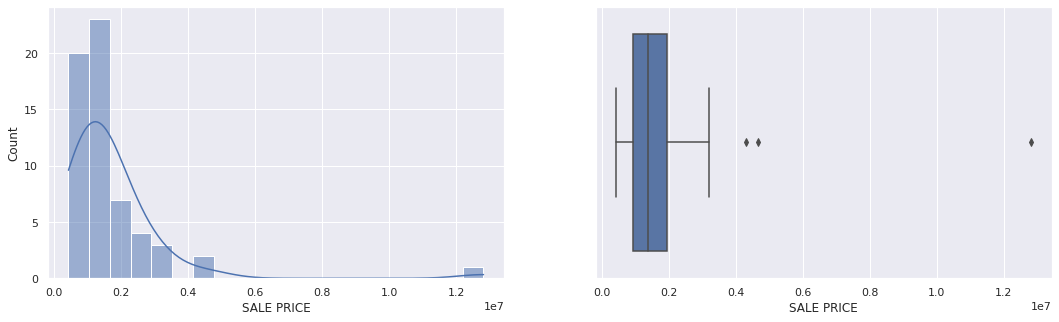

In [40]:
# create plot
fig, axes=plt.subplots(1,2, figsize=(18,5));
sns.histplot(df_hist,kde=True, bins=20,ax=axes[0]);
sns.boxplot(x=df_hist, ax=axes[1]);

The graphs above display probability distribution (left) and box plot (right) of the data. As the data is showing the mean value of property sale price each neighborhood in Brooklyn, it tells us that after the data has been cleaned and filtered with the aforementioned criteria:
- distribution of the data is gamma distribution (based on the shape of the probability distribution graph)
- highest price sold is at USD12,821,630 (which makes this an outlier as it is siginificantly higher than the rest of the data group)
- lowest price sold is USD421,790
- average sold price is USD1,701,545
- there are two other properties that are sold that fall as outliers that are around 4.2-4.5million USD
- most properties are sold within 600-900k (second bin on the probability distribution graph)

----------------------------------------
#### Confidence interval:
Disclaimer: based on the documentation published by [NYC Government](https://www1.nyc.gov/assets/finance/downloads/pdf/07pdf/glossary_rsf071607.pdf), we will refer TAX CLASS AT TIME OF SALE = 2 as <b>residential property</b>. Hence, the statements would be as follow:
- mean: the average sale price for residential properties in Brooklyn
- proportion: % of the residential properties sold in Brooklyn

In [41]:
df_brooklyn.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,11451.0,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,11451.000000,1.145100e+04
mean,3.0,4191.673129,370.635054,11218.615667,2.231770,0.139376,2.383198,2181.607895,2635.344249,1946.090298,1.466851e+06
std,0.0,2675.278661,547.263610,148.826010,6.335668,0.657875,6.384537,11117.567068,10112.266799,42.036560,4.268666e+06
min,3.0,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1800.000000,1.600000e+04
25%,3.0,1763.000000,25.000000,11209.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1915.000000,5.724000e+05
50%,3.0,4135.000000,54.000000,11220.000000,1.000000,0.000000,2.000000,1953.000000,1768.000000,1930.000000,8.750000e+05
75%,3.0,6550.000000,1004.000000,11233.000000,2.000000,0.000000,2.000000,2488.000000,2700.000000,1997.000000,1.400000e+06
max,3.0,8955.000000,3104.000000,11249.000000,324.000000,28.000000,324.000000,970000.000000,363100.000000,2016.000000,1.542500e+08


In [42]:
# check the header of the data
df_brooklyn.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25355,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,36 BAY 10TH STREET,,11228,1,0,1,1547.0,1428.0,1930,1,A5,800000.0,2017-02-27
25358,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,S1,1730 86TH STREET,,11214,1,1,2,1342.0,1920.0,1926,1,S1,1200000.0,2017-03-31
25359,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,S1,8642 20TH AVENUE,,11214,1,1,2,1740.0,3240.0,1925,1,S1,1090000.0,2016-10-24
25361,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,S1,1863 BATH AVENUE,,11214,1,1,2,1172.0,1800.0,1920,1,S1,1060000.0,2017-04-21
25362,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,A1,1906 BENSON AVENUE,,11214,1,0,1,5750.0,2386.0,1901,1,A1,2050000.0,2017-05-16


In [43]:
# create a dataframe that contains only TAX CLASS AT TIME OF SALE and SALE PRICE
df_brooklyn_t2=df_brooklyn[['TAX CLASS AT TIME OF SALE', 'SALE PRICE']]
df_brooklyn_t2

,TAX CLASS AT TIME OF SALE,SALE PRICE
25355,1,800000.0
25358,1,1200000.0
25359,1,1090000.0
25361,1,1060000.0
25362,1,2050000.0
...,...,...
49386,2,2225000.0
49392,4,300000.0
49393,4,3425000.0
49394,4,50000.0


In [44]:
# calculate the mean, count and std dev of the SALE PRICE column using groupby and aggregate technique
df_brooklyn_t2.groupby('TAX CLASS AT TIME OF SALE').agg({"SALE PRICE":[np.mean, np.std, np.size]})

SALE PRICE                      
                                   mean           std    size
TAX CLASS AT TIME OF SALE                                    
1                          9.944245e+05  7.968406e+05  7162.0
2                          1.722041e+06  4.047706e+06  3673.0
3                                   NaN           NaN     NaN
4                          5.437970e+06  1.467124e+07   616.0

In [45]:
# calculate MEAN confidence interval 
be = 1.722041e+06
z = 1.96
se = 4.047706e+06/np.sqrt(3673.0)
me=z*se
print((be-me, be+me))

(1591136.5025537454, 1852945.4974462546)


The average sale price of residential properties is between USD1,591,137 to USD1,852,945.

proportion - % of the residential properties sold in Brooklyn

In [46]:
# calculate PROPORTION confidence interval
# total data
n = 7162+3673+616
# proportion of TAX CLASS AT TIME OF SALE = 2
p = 3673 / n

# say that the confidence level is at 95%:
z=1.96
be = p
se = np.sqrt(p * (1-p)/(n))
me = z * se

print(be - me, be+me)

0.31220861739928635 0.32930740740204106


The proportion of residential properties sold in Brooklyn is 31.22-32.93%.

----------------------------------------
#### Hypothesis Testing
- Question: is it true that BATH BEACH neighborhood makes up more than 10% of the properties sold in Brooklyn?
    - H0: p <= 0.10
    - H1: p > 0.10

In [47]:
df_bath_beach=df_brooklyn[df_brooklyn['NEIGHBORHOOD']=='BATH BEACH']
df_bath_beach.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
25355,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6360,157,A5,36 BAY 10TH STREET,,11228,1,0,1,1547.0,1428.0,1930,1,A5,800000.0,2017-02-27
25358,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6367,42,S1,1730 86TH STREET,,11214,1,1,2,1342.0,1920.0,1926,1,S1,1200000.0,2017-03-31
25359,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6374,67,S1,8642 20TH AVENUE,,11214,1,1,2,1740.0,3240.0,1925,1,S1,1090000.0,2016-10-24
25361,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6405,49,S1,1863 BATH AVENUE,,11214,1,1,2,1172.0,1800.0,1920,1,S1,1060000.0,2017-04-21
25362,3,BATH BEACH,01 ONE FAMILY DWELLINGS,1,6406,25,A1,1906 BENSON AVENUE,,11214,1,0,1,5750.0,2386.0,1901,1,A1,2050000.0,2017-05-16


In [48]:
# calculate the total population, the number of the subject (BATH BEACH)
n=len(df_brooklyn)
bath_beach=len(df_bath_beach)
phat=bath_beach/n
pnull=0.1

print(n, bath_beach, phat, pnull)

11451 117 0.010217448257794078 0.1


In [49]:
# check if p is significantly different compared to our null hypothesis (H0) using stats
# determine alpha, for 95% confidence level, alpha = 0.05
zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')
print(pvalue) # second value is the p-value

1.0


In [50]:
# determine whether the hypothesis testing is being rejected/fail
alpha = 0.05
if (pvalue < alpha):
    print("REJECT null hypothesis. There is a significant difference between phat with pnull. BATH BEACH neighborhood makes up more than 10% of the properties sold in Brooklyn")
else:
    print("FAIL to reject null hypothesis. The difference is not significant, we are unsure if BATH BEACH neighborhood makes up more than 10% of the properties sold in Brooklyn")

FAIL to reject null hypothesis. The difference is not significant, we are unsure if BATH BEACH neighborhood makes up more than 10% of the properties sold in Brooklyn


---------------------------
Write your final conclusion below.

Your conclusion below are graded. (1 Points)

After further investigation of this particular NYC Property Sales data, we found that:
- there are properties that are marked as built in year 0 (requires further investigation as it is somewhat not possible)
    - such properties makes up a rather significant % of the data
- data contains properties that are sold but does not have any units (TOTAL UNITS = 0)
- after data cleaning, we found that Brooklyn makes up the highest properties sold in NYC area (21,675 properties), with:
    - average price: USD1,466,851.33
    - lowest price: USD16,000
    - highest price: USD154,250,000
- however, when we group and averaged it per neighborhood, we found that:
    - average price: USD1,701,545
    - lowest average price: USD421,790
    - highest average price: USD12,821,630
- for residential properties in Brooklyn (TAX CLASS AT TIME OF SALE = 2):
    - average sale price of residential properties is between USD1,591,137 to USD1,852,945
    - proportion of residential properties sold in Brooklyn is 31.22-32.93%
- based on the hypothesis testing, we are unsure if BATH BEACH neighborhood makes up more than 10% of the properties sold in Brooklyn.

----------------------